In [144]:
%matplotlib inline

import pandas as pd
import numpy as np
# import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression

# Read Data
* Data Descriptions: https://www.kaggle.com/c/titanic/data

In [107]:
# 본인의 환경에 맞게 경로 설정 해주세요.
train = pd.read_csv('../Data/kaggle/train.csv')
test = pd.read_csv('../Data/kaggle/test.csv')

In [108]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S


In [109]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,1072,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.0,NaN,S


## Check null values

In [110]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EDA

In [113]:
# 어떤 feature가 Survived 컬럼을 유의미하게 설명하는지 분석해보세요.

In [142]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


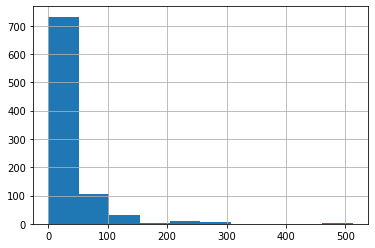

In [143]:
train['Fare'].hist()

# Concat Data

In [114]:
train_except_Survived = train.drop('Survived', axis=1)

In [115]:
train_except_Survived['tag'] = 'train'
test['tag'] = 'test'

In [116]:
df = pd.concat([train_except_Survived, test])

# Feature Engineering

In [117]:
# 작업

In [118]:
# 작업 예시
# fill data which contains null value in columns we want to use
# but fill null data as zero is not the best choice. find a better way.
# null이 있다면 0으로 채워줍니다. 최선의 방법은 아닙니다. 더 좋은 방법을 찾아보세요!
df = df.fillna(0)

# Make dataset for model fitting

In [119]:
# choose independent variables(Xs) which are useful!
# 트레이닝에 사용할 변수 목록을 적어주세요.
independents = ['Pclass']
dependent = ['Survived']

In [120]:
# 적어준 변수 목록을 사용해 데이터를 트레이닝에 맞는 포맷으로 변경합니다.
train_X = df[df['tag'] == 'train'][independents]
train_y = train[dependent]

test_X = df[df['tag'] == 'test'][independents]

# Model fitting

In [121]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)

In [122]:
# x 계수
# x 계수의 의미를 해석하세요.
reg.coef_

array([[-0.19699555]])

In [123]:
# 절편
reg.intercept_

array([0.83863059])

In [124]:
reg.score(train_X, train_y, sample_weight=None)

0.11456941170524182

# Prediction

In [125]:
prediction = reg.predict(test_X)

In [126]:
# 회귀 예측 결과를 classification으로 바꿔주기
# 여기에서는 회귀 예측 결과가 0.5 이상일 때에는 1, 그렇지 않으면 0으로 바꿔줬습니다.
prediction_binomial = [1 if p>=0.5 else 0 for p in prediction]

In [127]:
df = pd.DataFrame({'prediction': [p[0] for p in prediction],
                   'prediction_binomial': prediction_binomial})

In [128]:
df.sample()

,prediction,prediction_binomial
122,0.641635,1


# Submission

In [129]:
submission = pd.read_csv('../Data/kaggle/gender_submission.csv')

In [130]:
submission['Survived'] = df['prediction_binomial']

In [131]:
# submission.to_csv('./submission_baseline.csv', index=False)

# Rules
* 주어진 시간을 준수해주세요. Kaggle 제출과 채점까지 마친 상태여야 합니다.
* 모방은 창조의 어머니! 먼저 데이터를 분석해본 분석가들의 노트북을 보고 따라하세요.
* 새롭게 배우게 된 지식을 동료와 공유하세요.

# Hint
1. Logistic Regression으로도 풀어보세요. (이외에 다른 모델 사용 가능)
2. null 값이 있는 컬럼을 사용한다면, 현명하게 채워보세요.
3. Sex 컬럼을 regression에 넣을 수 있는 형태로 변형하세요.
4. 기존 데이터를 사용해 새로운 의미있는 변수를 만들어보세요. (캐글에 다른 노트북들을 참고하세요.)
    ### 참고해볼만한 노트북:
    * https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# 로지스틱 회귀?
* https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
* https://ratsgo.github.io/machine%20learning/2017/07/02/logistic/